# Projeto 1 - Ciência dos dados

### Giovanna Sardella Cabral | 2A Engenharia

** Pergunta:** O IDH (índice de desenvolvimento humano) é caracterizado por 3 diferentes fatores, a expectativa de vida, anos médios de estudo e anos esperados de escolaridade e renda (GDP ou PIB) per capita. Como conseguinte, a inflação e o número de bilionários também interferem no IDH dos países? 


# IDH, Inflação e número de bilionários
Foram coletados 3 dados do site https://www.gapminder.org/:
1. IDH(índice de desenvolvimento humano)
2. Inflação
3. Número de bilionários

Nesses dataframes, as linhas representam os países, as colunas representam o ano de 2007.
No dataframe IDH criado a seguir, o conteúdo de cada célula é a medida do IDH de um determinado ano (coluna) para determinado país (linha).
No dataframe inflation criado a seguir, o conteúdo de cada célula é a medida da inflação de um determinado ano (coluna) para um determinado país (linha). 
No dataframe billionaires criado a seguir, o conteúdo de cada célula é o número de bilionários de um determinado ano (coluna) para um determinado país (linha). 



# Introdução
O intuito desse projeto é analisar outros fatores que não caracterizam o IDH diretamente e observar se existe uma correlação entre estes e o IDH. Consequentemente, será possível identificar se a inflação e o número de bilionários interferem no IDH. 
O senso comum faz parte da população acreditar que quanto menor o índice de desenvolvimento humano e maior a inflação, menor o número de bilionários em um país. Assim, o estudo e análise desses dados tem como objetivo verificar se isto é realmente verdaderiro. 

# Leitura dos arquivos e mudanças de índices¶

In [55]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Leitura dos arquivos em Excel
IDH = pd.read_excel('hdi_human_development_index.xlsx')
inflation = pd.read_excel('inflation_annual_percent.xlsx')
billionaires = pd.read_excel('total_number_of_dollar_billionaires.xlsx')

# IDH
É possível verificar que cada linha representa um país e as colunas representam o ano de 2007

In [47]:
IDH = IDH.loc[:, ["geo", 2007]]
IDH= IDH.rename(columns = {'geo':'País', 2007:'IDH em 2007'})
IDH.head(4)


,País,IDH em 2007
0,Afghanistan,0.433
1,Albania,0.713
2,Algeria,0.697
3,Andorra,NaN


# Inflação
É possível verificar que cada linha representa um país e as colunas representam o ano de 2007

In [48]:
inflation = inflation.loc[:, ["geo", 2007]]
inflation = inflation.rename(columns = {'geo':'País', 2007:'Inflação em 2007'})
inflation.head(4)

,País,Inflação em 2007
0,Afghanistan,22.40
1,Albania,3.58
2,Algeria,6.42
3,Andorra,3.87


# Número de bilionários
É possível verificar que cada linha representa um país e as colunas representam o ano de 2007

In [49]:
billionaires = billionaires.loc[:, ["geo", 2007]]
billionaires = billionaires.rename(columns = {'geo':'País', 2007:'Bilionários em 2007'})
billionaires.head(4)

,País,Bilionários em 2007
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Andorra,0


# Inner join
Aqui os três dados coletados estarão na mesma tabela.

In [50]:
df = IDH.join(inflation, how='inner', lsuffix=' ', rsuffix=' ')
df.head(10)

,País,IDH em 2007,País,Inflação em 2007
0,Afghanistan,0.433,Afghanistan,22.40
1,Albania,0.713,Albania,3.58
2,Algeria,0.697,Algeria,6.42
3,Andorra,NaN,Andorra,3.87
4,Angola,0.468,Angola,12.60
5,Antigua and Barbuda,0.786,Antigua and Barbuda,3.74
6,Argentina,0.792,Argentina,14.90
7,Armenia,0.721,Armenia,4.23
8,Australia,0.921,Australia,4.98
9,Austria,0.864,Austria,2.33


In [52]:
data = df.join(billionaires, how="inner")
data.head(10)

,País,IDH em 2007,País,Inflação em 2007,País,Bilionários em 2007
0,Afghanistan,0.433,Afghanistan,22.40,Afghanistan,0
1,Albania,0.713,Albania,3.58,Albania,0
2,Algeria,0.697,Algeria,6.42,Algeria,0
3,Andorra,NaN,Andorra,3.87,Andorra,0
4,Angola,0.468,Angola,12.60,Angola,0
5,Antigua and Barbuda,0.786,Antigua and Barbuda,3.74,Antigua and Barbuda,0
6,Argentina,0.792,Argentina,14.90,Argentina,1
7,Armenia,0.721,Armenia,4.23,Armenia,0
8,Australia,0.921,Australia,4.98,Australia,12
9,Austria,0.864,Austria,2.33,Austria,3


# Análise e explicação dos resultados
Para a análise dos dados e melhor visualização desses, gráficos e outros recursos, como boxplot e histograma serão utilizados. 

In [53]:
def reta(dados_x, dados_y, nome_x = "Eixo X", nome_y = "Eixo Y"):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre ',nome_x,'  e ',nome_y,':')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(nome_x + " versus "+ nome_y)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

A correlação entre o IDH em 2007 e a inflação em 2007 é: -0.13410770034577624


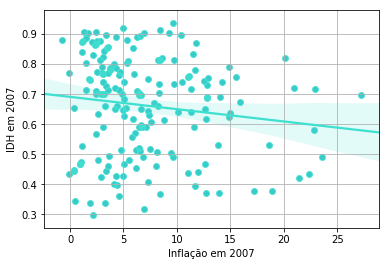

In [59]:
data.plot.scatter(x='Inflação em 2007',y='IDH em 2007', loglog = True);
sns.regplot(data["Inflação em 2007"],data["IDH em 2007"], color=('turquoise'))
plt.grid()
print('A correlação entre o IDH em 2007 e a inflação em 2007 é:', data['IDH em 2007'].corr(data['Inflação em 2007']))

A correlação entre o IDH em 2007 e o número de bilionários em 2007 é: -0.05302735302212071


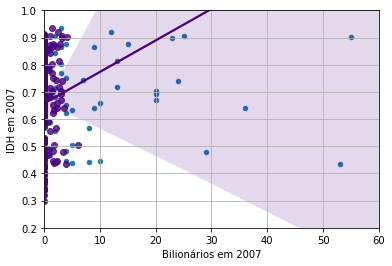

In [124]:
data.plot.scatter(x='Bilionários em 2007',y='IDH em 2007');
sns.regplot(data["Bilionários em 2007"],data["IDH em 2007"], color=('indigo'))
plt.axis([0, 60, 0.2, 1])
plt.grid()
print('A correlação entre o IDH em 2007 e o número de bilionários em 2007 é:', data['IDH em 2007'].corr(data['Bilionários em 2007']))

A correlação entre a inflação em 2007 e o número de bilionários em 2007  é: 0.013046112942306192


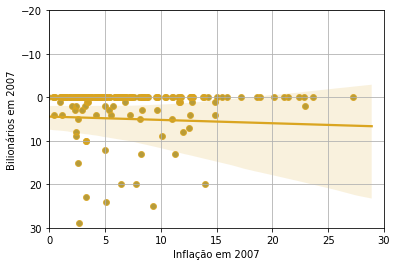

In [98]:
data.plot.scatter(x='Inflação em 2007',y='Bilionários em 2007');
sns.regplot(data["Inflação em 2007"],data["Bilionários em 2007"], color=('goldenrod'))
plt.axis([0, 30, 30, -20])
plt.grid()
print('A correlação entre a inflação em 2007 e o número de bilionários em 2007  é:', data['Inflação em 2007'].corr(data['Bilionários em 2007']))

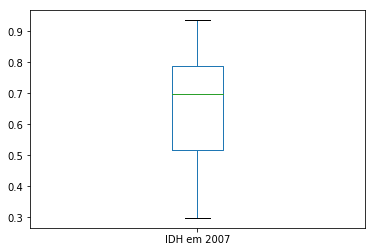

In [102]:
data.loc[:, 'IDH em 2007'].plot.box()

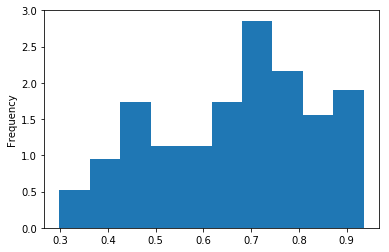

In [101]:
data["IDH em 2007"].plot.hist(density=True);

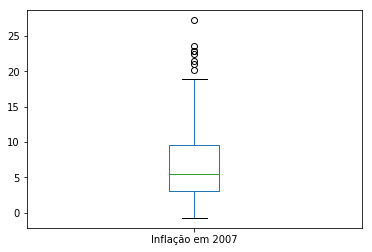

In [103]:
data.loc[:, 'Inflação em 2007'].plot.box()

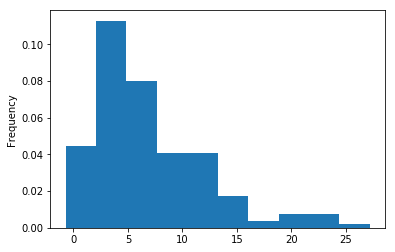

In [104]:
data["Inflação em 2007"].plot.hist(density=True);

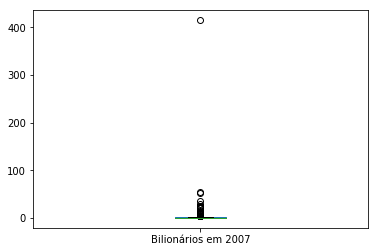

In [121]:
data.loc[:, 'Bilionários em 2007'].plot.box()

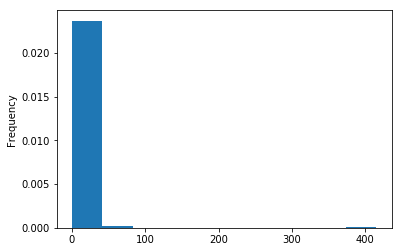

In [122]:
data["Bilionários em 2007"].plot.hist(density=True);